## Methods for Visualizing Unstructured Grid Data

### Overview

Unstructured grids are a powerful tool to store Geoscience data. Unlike traditional, structured grids, unstructured grids have flexible geometries and variable resolution. This makes them incredibly useful for filling in irregularly shaped domains like Earth's oceans, or for achieving high resolutions in localized regions. However, working with unstructured datasets comes with additional challenges. The grids are made up of various shapes with varying sizes, so many datasets store additional information that describes their grid's geometry. Before we can plot our data, we must convert this connectivity information into a format compatible with plotting software. In this notebook, we will discuss and compare various ways in which we can visualize unstructured datasets.

### Imports

In [2]:
# Recognition of unstructured grids and data handling
import uxarray as ux

# General Plotting
import cartopy.crs as ccrs

# Plotting with HoloViz
import holoviews as hv
import hvplot.pandas
import geoviews.feature as gf

### Dataset Overview

We will be visualizing data, courtesy of NCAR’s Falko Judt, and were produced as part of the DYAMOND initiative: http://dx.doi.org/10.1186/s40645-019-0304-z. 

The global data sets used in this example are from the same experiment, but run at several resolutions from 30km to 3.75km. Due to their size, the higher resolution data sets are only distributed with two variables in them: 

+ relhum_200hPa: Relative humidity vertically interpolated to 200 hPa
+ vorticity_200hPa: Relative vorticity vertically interpolated to 200 hPa

The relhum_200hPa is computed on the MPAS ‘primal’ mesh, while the vorticity_200hPa is computed on the MPAS ‘dual’ mesh. Note that data may also be sampled on the edges of the primal mesh. This example does not include/cover edge-centered data.

We will first load the data and grid information through `uxarray.open_dataset`, which lets us load files directly from the internet without downloading them.

In [4]:
# # Load data files from glade
# file_dir_30km = "/glade/campaign/cisl/vast/clyne/old_glade_p/FalkoJudt/dyamond_1/30km/"
# file_dir_15km = "/glade/campaign/cisl/vast/clyne/old_glade_p/FalkoJudt/dyamond_1/15km/"
# file_dir_7_5km = "/glade/campaign/cisl/vast/clyne/old_glade_p/FalkoJudt/dyamond_1/7.5km/"
# file_dir_3_75km = "/glade/campaign/cisl/vast/clyne/old_glade_p/FalkoJudt/dyamond_1/3.75km/"

# Use the local copies of the above glade files
file_dir_30km = "data/30km/"
file_dir_15km = "data/15km/"
file_dir_7_5km = "data/7.5km/"
file_dir_3_75km = "data/3.75km/"

# Note: The grid in the 3.75km dir does not have grid definition variables such as "verticesOnEdge".
# Since UXarray assumed those varables as required for MPAS-recognition, it can't open 3.75km for now.
# This will be fixed on UXarray soon.

grid_file_30km = "x1.655362.grid.nc"
grid_file_15km = "x1.2621442.grid.nc"
grid_file_7_5km = "x1.10485762.grid.nc" # 7.5km
grid_file_3_75km = "x1.41943042.grid.nc" # 3.75km

data_filename = "diag.2016-08-20_00.00.00.nc"

# Open datasets from files
ds_30km = ux.open_dataset(file_dir_30km + grid_file_30km, file_dir_30km + data_filename)
ds_15km = ux.open_dataset(file_dir_15km + grid_file_15km, file_dir_15km + data_filename)
# ds_7_5km = ux.open_dataset(file_dir_7_5km + grid_file_7_5km, file_dir_7_5km + data_filename)
# ds_3_75km = ux.open_dataset(file_dir_3_75km + grid_file_3_75km, file_dir_3_75km + data_filename)

Below we can see some information about the grid structure of each dataset. These are MPAS datasets, which means they contain a Primal mesh, composed of Voronoi regions, and a dual mesh, composed of Delaunay Triangles.

`nMesh2_face` and `nMesh2_node`describe the number of faces and nodes the dataset has, repsectively, which vary with the resolution.

In [5]:
ds_30km

<xarray.UxDataset>
Dimensions:             (Time: 1, StrLen: 64, nMesh2_face: 655362,
                         nMesh2_node: 1310720)
Dimensions without coordinates: Time, StrLen, nMesh2_face, nMesh2_node
Data variables: (12/90)
    xtime_old           (Time, StrLen) |S1 b'2' b'0' b'1' ... b' ' b' ' b' '
    taux                (Time, nMesh2_face) float32 0.001145 -0.4335 ... 0.1296
    tauy                (Time, nMesh2_face) float32 -0.003664 ... 0.04344
    olrtoa              (Time, nMesh2_face) float32 254.1 282.3 ... 199.6 209.9
    cldcvr              (Time, nMesh2_face) float32 1.0 1.0 1.0 ... 1.0 1.0 1.0
    vert_int_qv         (Time, nMesh2_face) float32 56.71 23.32 ... 7.523 7.568
    ...                  ...
    aclwupt             (Time, nMesh2_face) float32 4.047e+08 ... 3.801e+08
    aclwdnt             (Time, nMesh2_face) float32 0.0 0.0 0.0 ... 0.0 0.0 0.0
    aclwnett            (Time, nMesh2_face) float32 -4.047e+08 ... -3.801e+08
    rainc               (Time, nMesh2_face) float32 58.94 10.82 ... 25.57 28.74
    rainnc              (Time, nMesh2_face) float32 0.003394 0.3716 ... 17.9
    xtime               (Time, StrLen) |S1 b'2' b'0' b'1' ... b' ' b' ' b' '

In [6]:
ds_30km.uxgrid

<uxarray.Grid>
Original Grid Type: MPAS
Grid Dimensions:
  * nMesh2_node: 1310720
  * nMesh2_face: 655362
  * nMaxMesh2_face_nodes: 10
  * nMesh2_edge: 1966080
  * Two: 2
  * nMesh2_edge: 1966080
Grid Coordinate Variables:
  * Mesh2_node_x: (1310720,)
  * Mesh2_node_y: (1310720,)
  * Mesh2_face_x: (655362,)
  * Mesh2_face_y: (655362,)
Grid Connectivity Variables:
  * Mesh2_face_nodes: (655362, 10)
  * Mesh2_edge_nodes: (1966080, 2)
  * nNodes_per_face: (655362,)

In [7]:
ds_15km

<xarray.UxDataset>
Dimensions:             (Time: 1, StrLen: 64, nMesh2_face: 2621442,
                         nMesh2_node: 5242880)
Dimensions without coordinates: Time, StrLen, nMesh2_face, nMesh2_node
Data variables: (12/90)
    xtime_old           (Time, StrLen) |S1 b'2' b'0' b'1' ... b' ' b' ' b' '
    taux                (Time, nMesh2_face) float32 0.09107 ... -0.07837
    tauy                (Time, nMesh2_face) float32 -0.1514 0.07818 ... 0.06626
    olrtoa              (Time, nMesh2_face) float32 218.2 286.8 ... 283.6 294.9
    cldcvr              (Time, nMesh2_face) float32 1.0 0.0 1.0 ... 1.0 1.0 0.0
    vert_int_qv         (Time, nMesh2_face) float32 9.354 40.38 ... 27.2 27.46
    ...                  ...
    aclwupt             (Time, nMesh2_face) float32 3.254e+08 ... 4.702e+08
    aclwdnt             (Time, nMesh2_face) float32 0.0 0.0 0.0 ... 0.0 0.0 0.0
    aclwnett            (Time, nMesh2_face) float32 -3.254e+08 ... -4.702e+08
    rainc               (Time, nMesh2_face) float32 17.2 21.09 ... 9.857 9.218
    rainnc              (Time, nMesh2_face) float32 35.07 0.000203 ... 0.0004236
    xtime               (Time, StrLen) |S1 b'2' b'0' b'1' ... b' ' b' ' b' '

In [8]:
ds_15km.uxgrid

<uxarray.Grid>
Original Grid Type: MPAS
Grid Dimensions:
  * nMesh2_node: 5242880
  * nMesh2_face: 2621442
  * nMaxMesh2_face_nodes: 10
  * nMesh2_edge: 7864320
  * Two: 2
  * nMesh2_edge: 7864320
Grid Coordinate Variables:
  * Mesh2_node_x: (5242880,)
  * Mesh2_node_y: (5242880,)
  * Mesh2_face_x: (2621442,)
  * Mesh2_face_y: (2621442,)
Grid Connectivity Variables:
  * Mesh2_face_nodes: (2621442, 10)
  * Mesh2_edge_nodes: (7864320, 2)
  * nNodes_per_face: (2621442,)

In [9]:
# ds_7_5km.uxgrid

### Initial Setup

Now that our datasets are loaded in, we will begin exploring Uxarray visualization methods.

In [10]:
# Variable names to use
primal_var_name = 'relhum_200hPa'
dual_var_name = 'vorticity_200hPa'

color_map = 'coolwarm'

## Plotting with HoloViz tools

HoloViz is a set of tools that simplifies Python visualizations by calling plotting libraries such as `Datashader` in the backend. The next section of the notebook discusses visualizations of unstructured grids using HoloViz tools.

Creating a vector image can be computationally expensive and will likely take quite some time, especially for larger datasets. Another approach can be to rasterize the data, which converts geometries (points etc.) to a raster image.

We will only look into the rasterization approaches for high-performance, km-scale data visualizations in this notebook

## Rasterized Points

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
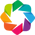

In [11]:
hv.extension('bokeh')

### Primal mesh variable (Relative humidity) - No projection

In [16]:
%%time
raster = ds_15km[primal_var_name].sel(Time=0).plot.rasterize()
# This is actually equivalent to calling as follows since we handle default values for several optional largs
# raster = ds_15km[primal_var_name].sel(Time=0).plot.rasterize(colorbar=True,
#                                                              cmap='coolwarm',
#                                                              width=1000,
#                                                              height=500,
#                                                              tools=['hover'],
#                                                              projection=None,
#                                                              aggregator='mean',
#                                                              interpolation='linear',
#                                                              precompute=True,
#                                                              dynamic=False,
#                                                              npartitions=1)

display(raster.opts(title="relhum_200hPa"))

CPU times: user 103 ms, sys: 15.5 ms, total: 118 ms
Wall time: 108 ms


:Image   [lon,lat]   (lon_lat var)

### Primal mesh variable (Relative humidity) - ccrs.Robinson projection

In [13]:
%%time
projection = ccrs.Robinson()
raster = ds_15km[primal_var_name].sel(Time=0).plot.rasterize(projection=projection)

(raster.opts(title="relhum_200hPa - ccrs.Robinson")
 * gf.land.opts(projection=projection, fill_color='forestgreen', alpha=0.3) 
 * gf.coastline.opts(projection=projection, alpha=0.4) 
 * gf.borders.opts(projection=projection, alpha=0.3))

CPU times: user 467 ms, sys: 47.5 ms, total: 515 ms
Wall time: 506 ms


:Overlay
   .Image.I     :Image   [lon,lat]   (lon_lat var)
   .Land.I      :Feature   [Longitude,Latitude]
   .Coastline.I :Feature   [Longitude,Latitude]
   .Borders.I   :Feature   [Longitude,Latitude]

### Dual mesh variable (Relative vorticity) - ccrs.Robinson projection

In [14]:
%%time
projection = ccrs.Robinson()
raster = ds_15km[dual_var_name].sel(Time=0).plot.rasterize(projection=projection)

(raster.opts(title="Vorticity_200hPa - ccrs.Robinson")
 * gf.land.opts(projection=projection, fill_color='forestgreen', alpha=0.1) 
 * gf.coastline.opts(projection=projection, alpha=0.4) 
 * gf.borders.opts(projection=projection, alpha=0.3))

CPU times: user 409 ms, sys: 50.4 ms, total: 459 ms
Wall time: 445 ms


:Overlay
   .Image.I     :Image   [lon,lat]   (lon_lat var)
   .Land.I      :Feature   [Longitude,Latitude]
   .Coastline.I :Feature   [Longitude,Latitude]
   .Borders.I   :Feature   [Longitude,Latitude]